In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-optimize


**DecisionTreeClassifier**

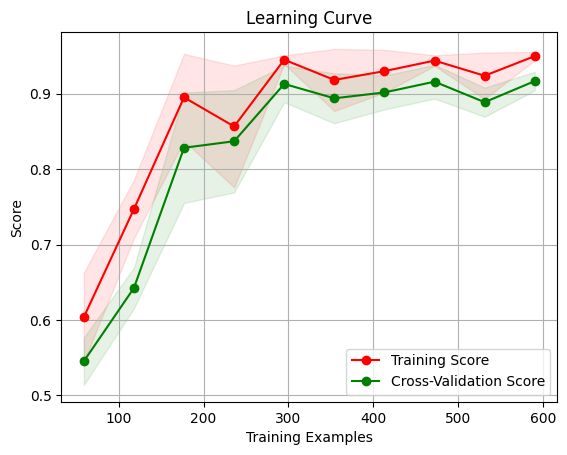

Precision: 0.85
Recall: 0.94
F1 Score: 0.89
Accuracy: 0.91


In [12]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from skopt import BayesSearchCV
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/WaterContentFrequency/dataset/last_leaf_data.csv')

# Loop to generate 100 sets of noisy data
noisy_data_list = []
for i in range(100):
    noisy_data = pd.DataFrame({
        'Timestamps': [1897515200698 + i * 1000],
        'Thickness (mm)': [0.25],
        'Frequency (THz)': [0.4],
        'Leaf age': [random.randint(2, 5)],
        'Leaf surface area': [random.randint(2, 3)],
        'Need Water': [random.choice([True, False])]
    })
    noisy_data_list.append(noisy_data)

# Concatenate existing data with the noisy data list
data = pd.concat([data] + noisy_data_list, ignore_index=True)

# Extract the features and target variable
X = data[['Timestamps', 'Thickness (mm)', 'Frequency (THz)', 'Leaf age', 'Leaf surface area']]
y = data['Need Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Decision Tree classifier instance
dt = DecisionTreeClassifier()

# Define the parameter search space for Bayesian Optimization
param_space = {
    'max_depth': (2, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': (1, X_train_scaled.shape[1])
}

# Create a Bayesian Optimization instance
opt = BayesSearchCV(dt, param_space, n_iter=50, cv=5, scoring='balanced_accuracy')

# Perform the Bayesian Optimization search
opt.fit(X_train_scaled, y_train)

# Get the best estimator
best_estimator = opt.best_estimator_

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_estimator, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate precision, recall, F1 score, and accuracy
best_estimator.fit(X_train_scaled, y_train)
y_pred = best_estimator.predict(X_test_scaled)
precision = precision_score(y_test, y_pred, pos_label=1)  # Calculate precision only for class 1
recall = recall_score(y_test, y_pred, pos_label=1)  # Calculate recall only for class 1
f1 = f1_score(y_test, y_pred, pos_label=1)  # Calculate F1 score only for class 1
accuracy = accuracy_score(y_test, y_pred)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

# Display precision, recall, F1 score, and accuracy
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

**RandomForestClassifier**

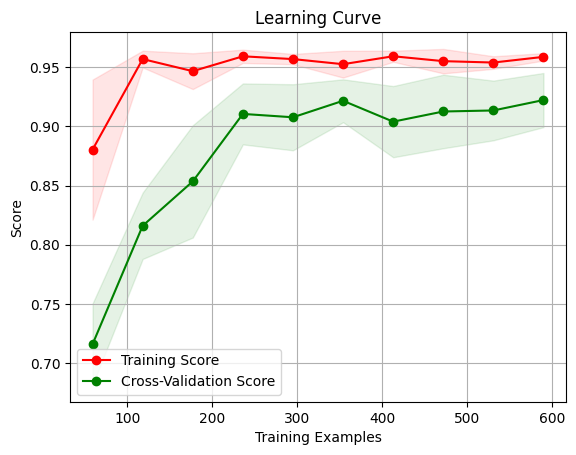

Precision: 0.90
Recall: 0.93
F1 Score: 0.92
Accuracy: 0.94


In [14]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from skopt import BayesSearchCV
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/WaterContentFrequency/dataset/last_leaf_data.csv')

# Loop to generate 100 sets of noisy data
noisy_data_list = []
for i in range(100):
    noisy_data = pd.DataFrame({
        'Timestamps': [1897515200698 + i * 1000],
        'Thickness (mm)': [0.25],
        'Frequency (THz)': [0.4],
        'Leaf age': [random.randint(2, 5)],
        'Leaf surface area': [random.randint(2, 3)],
        'Need Water': [random.choice([True, False])]
    })
    noisy_data_list.append(noisy_data)

# Concatenate existing data with the noisy data list
data = pd.concat([data] + noisy_data_list, ignore_index=True)

# Extract the features and target variable
X = data[['Timestamps', 'Thickness (mm)', 'Frequency (THz)', 'Leaf age', 'Leaf surface area']]
y = data['Need Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier instance
rf = RandomForestClassifier()

# Define the parameter search space for Bayesian Optimization
param_space = {
    'max_depth': (2, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10),
    'max_features': (1, X_train_scaled.shape[1])
}

# Create a Bayesian Optimization instance
opt = BayesSearchCV(rf, param_space, n_iter=50, cv=5, scoring='balanced_accuracy')

# Perform the Bayesian Optimization search
opt.fit(X_train_scaled, y_train)

# Get the best estimator
best_estimator = opt.best_estimator_

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_estimator, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate precision, recall, F1 score, and accuracy
best_estimator.fit(X_train_scaled, y_train)
y_pred = best_estimator.predict(X_test_scaled)
precision = precision_score(y_test, y_pred, pos_label=1)  # Calculate precision only for class 1
recall = recall_score(y_test, y_pred, pos_label=1)  # Calculate recall only for class 1
f1 = f1_score(y_test, y_pred, pos_label=1)  # Calculate F1 score only for class 1
accuracy = accuracy_score(y_test, y_pred)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

# Display precision, recall, F1 score, and accuracy
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

**KNNClassifier**

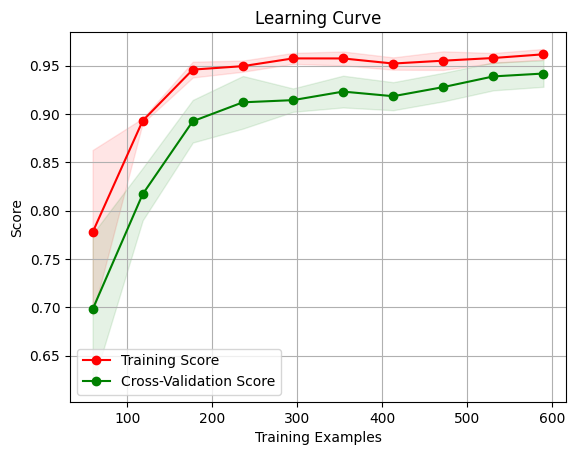

Precision: 0.90
Recall: 0.85
F1 Score: 0.88
Accuracy: 0.90


In [4]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from skopt import BayesSearchCV
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/WaterContentFrequency/dataset/last_leaf_data.csv')

# Loop to generate 100 sets of noisy data
noisy_data_list = []
for i in range(100):
    noisy_data = pd.DataFrame({
        'Timestamps': [1897515200698 + i * 1000],
        'Thickness (mm)': [0.25],
        'Frequency (THz)': [0.4],
        'Leaf age': [random.randint(2, 5)],
        'Leaf surface area': [random.randint(2, 3)],
        'Need Water': [random.choice([True, False])]
    })
    noisy_data_list.append(noisy_data)

# Concatenate existing data with the noisy data list
data = pd.concat([data] + noisy_data_list, ignore_index=True)

# Extract the features and target variable
X = data[['Timestamps', 'Thickness (mm)', 'Frequency (THz)', 'Leaf age', 'Leaf surface area']]
y = data['Need Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a K-Nearest Neighbors (KNN) classifier instance
knn = KNeighborsClassifier()

# Define the parameter search space for Bayesian Optimization
param_space = {
    'n_neighbors': (1, 10),
    'weights': ['uniform', 'distance'],
    'p': (1, 2)
}

# Create a Bayesian Optimization instance
opt = BayesSearchCV(knn, param_space, n_iter=50, cv=5, scoring='balanced_accuracy')

# Perform the Bayesian Optimization search
opt.fit(X_train_scaled, y_train)

# Get the best estimator
best_estimator = opt.best_estimator_

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_estimator, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate precision, recall, F1 score, and accuracy
best_estimator.fit(X_train_scaled, y_train)
y_pred = best_estimator.predict(X_test_scaled)
precision = precision_score(y_test, y_pred, pos_label=1)  # Calculate precision only for class 1
recall = recall_score(y_test, y_pred, pos_label=1)  # Calculate recall only for class 1
f1 = f1_score(y_test, y_pred, pos_label=1)  # Calculate F1 score only for class 1
accuracy = accuracy_score(y_test, y_pred)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

# Display precision, recall, F1 score, and accuracy
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

**Gradient Boosting Machines**

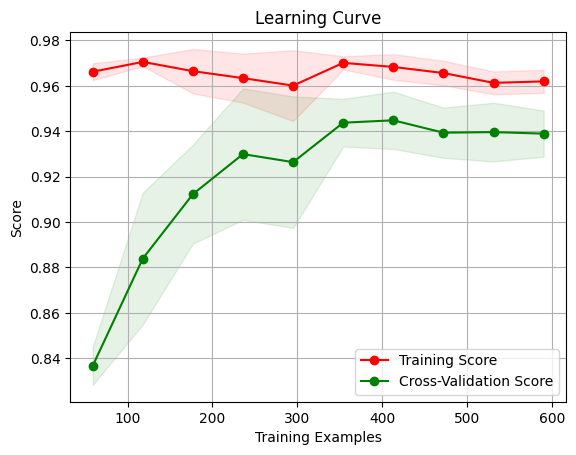

Precision: 0.87
Recall: 1.00
F1 Score: 0.93
Accuracy: 0.94


In [3]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from skopt import BayesSearchCV
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/WaterContentFrequency/dataset/last_leaf_data.csv')

# Loop to generate 100 sets of noisy data
noisy_data_list = []
for i in range(100):
    noisy_data = pd.DataFrame({
        'Timestamps': [1897515200698 + i * 1000],
        'Thickness (mm)': [0.25],
        'Frequency (THz)': [0.4],
        'Leaf age': [random.randint(2, 5)],
        'Leaf surface area': [random.randint(2, 3)],
        'Need Water': [random.choice([True, False])]
    })
    noisy_data_list.append(noisy_data)

# Concatenate existing data with the noisy data list
data = pd.concat([data] + noisy_data_list, ignore_index=True)

# Extract the features and target variable
X = data[['Timestamps', 'Thickness (mm)', 'Frequency (THz)', 'Leaf age', 'Leaf surface area']]
y = data['Need Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Gradient Boosting Machines (GBM) classifier instance
gbm = GradientBoostingClassifier()

# Define the parameter search space for Bayesian Optimization
param_space = {
    'n_estimators': (50, 200),
    'learning_rate': (0.01, 0.1),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
}

# Create a Bayesian Optimization instance
opt = BayesSearchCV(gbm, param_space, n_iter=50, cv=5, scoring='balanced_accuracy')

# Perform the Bayesian Optimization search
opt.fit(X_train_scaled, y_train)

# Get the best estimator
best_estimator = opt.best_estimator_

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_estimator, X_train_scaled, y_train, cv=5,
                                                       scoring='balanced_accuracy',
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate precision, recall, F1 score, and accuracy
best_estimator.fit(X_train_scaled, y_train)
y_pred = best_estimator.predict(X_test_scaled)
precision = precision_score(y_test, y_pred, pos_label=1)  # Calculate precision only for class 1
recall = recall_score(y_test, y_pred, pos_label=1)  # Calculate recall only for class 1
f1 = f1_score(y_test, y_pred, pos_label=1)  # Calculate F1 score only for class 1
accuracy = accuracy_score(y_test, y_pred)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

# Display precision, recall, F1 score, and accuracy
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")